# Bộ lọc FIR sẽ được thiết kế để lọc 3 băng tần chính: Low, Mid, và High.

1. Xác định các Thông Số Bộ Lọc
- Tần số lấy mẫu (Sampling Frequency): 44100 Hz (chuẩn âm thanh).
- Băng tần:
    - Low: 20 - 200 Hz
    - Mid: 200 - 2000 Hz
    - High: 2000 - 20000 Hz
- Số taps: 101 (số lượng coefficients)

2. Lựa Chọn Cửa Sổ
- Chọn Hamming window để có đáp ứng tần số tốt mà vẫn đảm bảo mượt mà ở các biên độ.

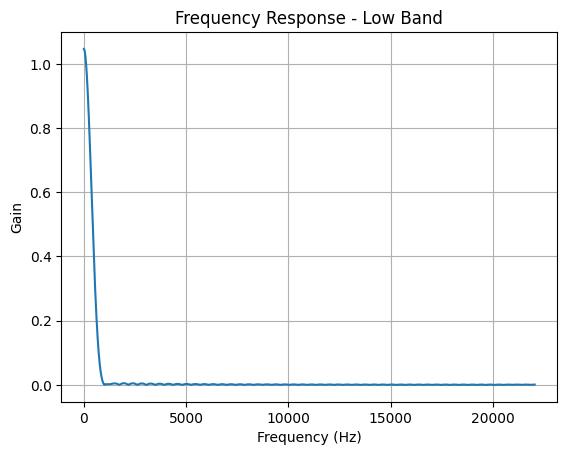

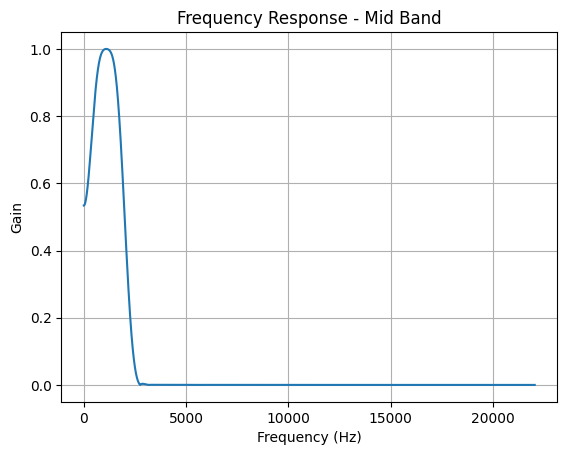

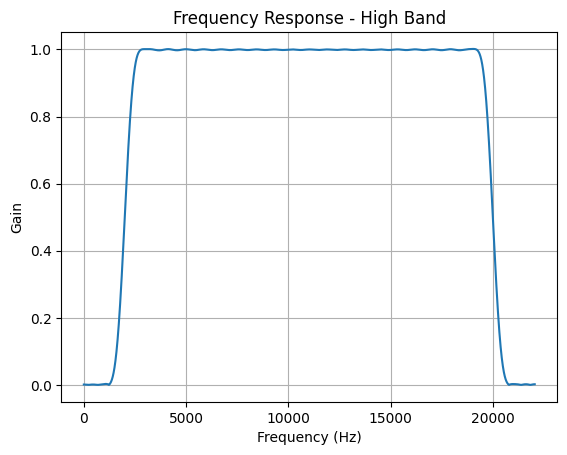

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter

# 1. Đặt các tham số
fs = 44100  # Tần số lấy mẫu (Hz)
num_taps = 101  # Số lượng taps (số coefficients)

# 2. Tính toán tần số cắt cho từng băng tần (chuẩn hóa theo Nyquist)
nyquist = fs / 2
low_cutoff = [20 / nyquist, 200 / nyquist]  # Low band
mid_cutoff = [200 / nyquist, 2000 / nyquist]  # Mid band
high_cutoff = [2000 / nyquist, 20000 / nyquist]  # High band

# 3. Thiết kế bộ lọc FIR cho từng băng tần
low_band = firwin(num_taps, low_cutoff, pass_zero=False, window='hamming')  # Bộ lọc thông dải Low
mid_band = firwin(num_taps, mid_cutoff, pass_zero=False, window='hamming')  # Bộ lọc thông dải Mid
high_band = firwin(num_taps, high_cutoff, pass_zero=False, window='hamming')  # Bộ lọc thông dải High

# 4. Hàm apply_filter để áp dụng bộ lọc FIR lên tín hiệu đầu vào


def apply_filter(signal, filter_coefficients):
    return lfilter(filter_coefficients, 1.0, signal)

# 5. Kiểm tra đáp ứng tần số của từng bộ lọc
def plot_frequency_response(coefficients, band_name):
    w, h = freqz(coefficients, worN=8000)
    plt.plot((w / np.pi) * nyquist, np.abs(h), label=f'{band_name} Band')
    plt.title(f'Frequency Response - {band_name} Band')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid()
    plt.show()

plot_frequency_response(low_band, 'Low')
plot_frequency_response(mid_band, 'Mid')
plot_frequency_response(high_band, 'High')
    

## Áp Dụng Bộ Lọc vào Tín Hiệu Âm Thanh
Áp dụng các bộ lọc vào một tín hiệu âm thanh đầu vào, sử dụng hàm lfilter từ SciPy.

In [2]:
import soundfile as sf

# Đọc file âm thanh đầu vào (giả sử file có tên 'input.wav')
input_signal, fs = sf.read('input.wav')

# Lọc tín hiệu qua từng bộ lọc băng tần
low_filtered = lfilter(low_band, 1.0, input_signal)
mid_filtered = lfilter(mid_band, 1.0, input_signal)
high_filtered = lfilter(high_band, 1.0, input_signal)

# Kết hợp các tín hiệu đã lọc (có thể điều chỉnh độ lợi của từng băng tần tại đây)
output_signal = low_filtered + mid_filtered + high_filtered

# Ghi tín hiệu đã xử lý vào file output
sf.write('output.wav', output_signal, fs)
    

## Kết Hợp với Giao Diện Điều Khiển Equalizer
Nếu bạn muốn thay đổi Gain của từng băng tần (low, mid, high) từ giao diện người dùng, bạn có thể thêm các hệ số khuếch đại cho từng tín hiệu đã lọc:

In [3]:

# Các hệ số điều chỉnh độ lợi cho từng băng tần
gain_low = 1.0
gain_mid = 1.2
gain_high = 0.8

# Áp dụng độ lợi cho từng băng tần
output_signal = gain_low * low_filtered + gain_mid * mid_filtered + gain_high * high_filtered
sf.write('output_adjusted.wav', output_signal, fs)

    

## Kiểm Tra và Hiển Thị Đáp Ứng Tần Số Sau Khi Điều Chỉnh Gain
Khi điều chỉnh Gain, bạn có thể kiểm tra lại đáp ứng tần số tổng hợp để đảm bảo chất lượng.

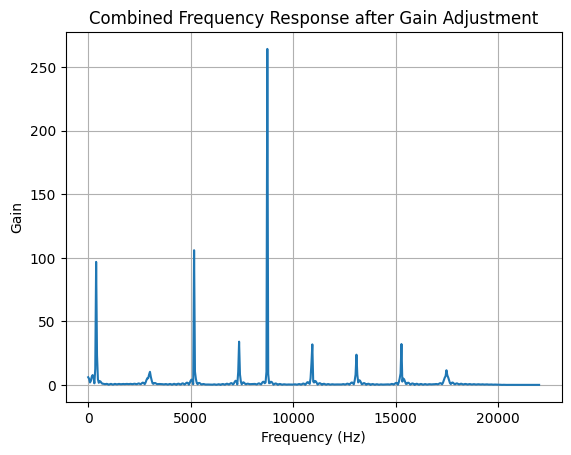

In [4]:

w, h = freqz(output_signal)
plt.plot((w / np.pi) * nyquist, np.abs(h))
plt.title('Combined Frequency Response after Gain Adjustment')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.show()
    

In [5]:

def setUp(self):
        # Đặt tham số tần số lấy mẫu và Nyquist
        self.fs = fs
        self.nyquist = self.fs / 2
        # Khởi tạo tín hiệu mẫu để kiểm thử
        self.t = np.linspace(0, 1, self.fs, endpoint=False)
        self.signal = (
            np.sin(2 * np.pi * 100 * self.t) +   # Tần số thấp
            np.sin(2 * np.pi * 1000 * self.t) +  # Tần số trung bình
            np.sin(2 * np.pi * 5000 * self.t)    # Tần số cao
        )

def test_low_band_filter(self):
        """Kiểm tra bộ lọc băng tần thấp."""
        w, h = freqz(low_band)
        pass_band_gain = np.abs(h[(w * self.fs / (2 * np.pi)) < 200]).max()
        stop_band_gain = np.abs(h[(w * self.fs / (2 * np.pi)) > 200]).max()
        self.assertGreater(pass_band_gain, 0.8,
                           "Gain của băng tần thấp quá thấp.")
        self.assertLess(
            stop_band_gain, 0.2, "Độ suy giảm của băng tần thấp quá cao ngoài băng thông.")

def test_mid_band_filter(self):
        """Kiểm tra bộ lọc băng tần trung."""
        w, h = freqz(mid_band)
        pass_band_gain = np.abs(
            h[(w * self.fs / (2 * np.pi) >= 200) & (w * self.fs / (2 * np.pi) <= 2000)]).max()
        stop_band_gain_low = np.abs(h[(w * self.fs / (2 * np.pi) < 200)]).max()
        stop_band_gain_high = np.abs(
            h[(w * self.fs / (2 * np.pi) > 2000)]).max()
        self.assertGreater(pass_band_gain, 0.8,
                           "Gain của băng tần trung bình quá thấp.")
        self.assertLess(stop_band_gain_low, 0.2,
                        "Độ suy giảm thấp ngoài băng tần trung bình quá cao.")
        self.assertLess(stop_band_gain_high, 0.2,
                        "Độ suy giảm cao ngoài băng tần trung bình quá cao.")

def test_high_band_filter(self):
        """Kiểm tra bộ lọc băng tần cao."""
        w, h = freqz(high_band)
        pass_band_gain = np.abs(h[(w * self.fs / (2 * np.pi)) > 2000]).max()
        stop_band_gain = np.abs(h[(w * self.fs / (2 * np.pi)) < 2000]).max()
        self.assertGreater(pass_band_gain, 0.8,
                           "Gain của băng tần cao quá thấp.")
        self.assertLess(stop_band_gain, 0.2,
                        "Độ suy giảm của băng tần cao quá cao ngoài băng thông.")

def test_filter_stability(self):
        """Kiểm tra độ ổn định của bộ lọc."""
        stable_signal = np.random.uniform(-1, 1, len(self.signal))
        output = apply_filter(stable_signal, low_band)
        self.assertTrue(np.all(np.abs(output) <= 1), "Bộ lọc không ổn định.")

def test_output_signal_length(self):
        """Kiểm tra độ dài của tín hiệu sau khi lọc."""
        filtered_signal = apply_filter(self.signal, low_band)
        self.assertEqual(len(filtered_signal), len(
            self.signal), "Độ dài tín hiệu sau khi lọc không khớp với tín hiệu gốc.")

def test_linear_phase_response(self):
        """Kiểm tra đáp ứng pha tuyến tính của bộ lọc."""
        w, h = freqz(low_band)
        phase = np.unwrap(np.angle(h))
        linearity = np.polyfit(w, phase, 1)[0]
        self.assertAlmostEqual(linearity, 0, places=2,
                               msg="Bộ lọc không có pha tuyến tính.")

def test_signal_energy_conservation(self):
        """Kiểm tra bảo toàn năng lượng của tín hiệu sau khi lọc."""
        filtered_signal = apply_filter(self.signal, mid_band)
        input_energy = np.sum(self.signal**2)
        output_energy = np.sum(filtered_signal**2)
        self.assertAlmostEqual(input_energy, output_energy, delta=0.1 * input_energy, msg="Năng lượng tín hiệu không được bảo toàn sau khi lọc.")

def test_single_frequency_response_within_band(self):
        """Kiểm tra bộ lọc với tín hiệu tần số đơn trong băng thông."""
        test_freq = 150  # Tần số nằm trong băng thông của bộ lọc thấp
        test_signal = np.sin(2 * np.pi * test_freq * self.t)
        filtered_signal = apply_filter(test_signal, low_band)
        output_energy = np.sum(filtered_signal**2)
        self.assertGreater(
            output_energy, 0.1, "Bộ lọc không cho tín hiệu tần số đơn trong băng thông đi qua đúng cách.")

def test_single_frequency_response_outside_band(self):
        """Kiểm tra bộ lọc với tín hiệu tần số đơn ngoài băng thông."""
        test_freq = 5000  # Tần số nằm ngoài băng thông của bộ lọc thấp
        test_signal = np.sin(2 * np.pi * test_freq * self.t)
        filtered_signal = apply_filter(test_signal, low_band)
        output_energy = np.sum(filtered_signal**2)
        self.assertLess(output_energy, 0.1, "Bộ lọc không suy giảm đúng tín hiệu tần số đơn ngoài băng thông.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz
import ipywidgets as widgets
from IPython.display import display

# Tham số cố định
fs = 44100  # Tần số lấy mẫu (Hz)
nyquist = fs / 2  # Tần số Nyquist

# Hàm để tạo và áp dụng bộ lọc FIR
def create_filter(num_taps, cutoff, window_type):
    return firwin(num_taps, cutoff, pass_zero=False, window=window_type)

# Hàm để vẽ đáp ứng tần số của bộ lọc
def plot_frequency_response(filter_coefficients, title="Frequency Response"):
    w, h = freqz(filter_coefficients, worN=1024) 
    plt.figure(figsize=(8, 4))
    plt.plot((w / np.pi) * nyquist, np.abs(h))
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid()
    plt.show()

# Hàm kiểm thử bộ lọc với slider cho các tham số
def test_filter(num_taps, low_cutoff, high_cutoff, window_type):
    # Tạo các bộ lọc với các tham số từ slider
    low_band = create_filter(num_taps, [20 / nyquist, low_cutoff / nyquist], window_type)
    mid_band = create_filter(num_taps, [low_cutoff / nyquist, high_cutoff / nyquist], window_type)
    high_band = create_filter(num_taps, [high_cutoff / nyquist, 20000 / nyquist], window_type)

    # Vẽ đáp ứng tần số của các bộ lọc
    plot_frequency_response(low_band, title="Low Band Filter Response")
    plot_frequency_response(mid_band, title="Mid Band Filter Response")
    plot_frequency_response(high_band, title="High Band Filter Response")

# Tạo slider để điều chỉnh các tham số với phạm vi nhỏ hơn
num_taps_slider = widgets.IntSlider(value=51, min=10, max=101, step=5, description='Num Taps')
low_cutoff_slider = widgets.FloatSlider(value=200, min=100, max=500, step=10, description='Low Cutoff (Hz)')
high_cutoff_slider = widgets.FloatSlider(value=2000, min=1000, max=5000, step=100, description='High Cutoff (Hz)')
window_type_dropdown = widgets.Dropdown(options=['hamming'], value='hamming', description='Window Type')

# Sử dụng widgets để điều khiển các tham số và chạy kiểm thử
ui = widgets.VBox([num_taps_slider, low_cutoff_slider, high_cutoff_slider, window_type_dropdown])
out = widgets.interactive_output(test_filter, {
    'num_taps': num_taps_slider,
    'low_cutoff': low_cutoff_slider,
    'high_cutoff': high_cutoff_slider,
    'window_type': window_type_dropdown
})

display(ui, out)


Output()